Jaqueline Pinheiro

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy.stats import levene

## Question 1
#### letter d)

In [215]:

df = pd.read_excel('wage.xlsx')
df['lwage'] = np.log(df['wage'])
df = df[['lwage','male']]
df

,lwage,male
0,1.842975,0
1,1.701063,0
2,1.292580,0
3,1.524607,0
4,0.883006,0
...,...,...
3291,1.455614,1
3292,1.966439,1
3293,1.512659,1
3294,1.067848,1


In [216]:
### Robust test

# Calculate mean, sample variannce for male and female
y_m = df[df['male'] == 1]['lwage']
y_f = df[df['male'] == 0]['lwage']
n_m = len(y_m)
n_f = len(y_f)
mean_m = np.mean(y_m)
mean_f = np.mean(y_f)
s_m = np.var(y_m)
s_f = np.var(y_f)

# Calculate T
T = np.sqrt((n_m*n_f)/(n_m+n_f))*(np.log(s_f) - np.log(s_m))

# Calculate K hat
k_hat = ((n_m+n_f)*(np.sum((y_f-mean_f)**4) + np.sum((y_m-mean_m)**4)))/((np.sum((y_f-mean_f)**2) + np.sum((y_m-mean_m)**2))**2)

# Calculate C statistic
c = T/np.sqrt(k_hat - 1)


print("T:", T)
print("K hat:", k_hat)
print("C statistic:", c)
if (c > 1.64):
    print('Reject H0: Var female > Var male')
else:
    print('Fail to reject H0: Var female = Var male')

T: 2.36042302721787
K hat: 7.3781207090510135
C statistic: 0.9346380888883526
Fail to reject H0: Var female = Var male


In [217]:
## Checking with levene

levene_test = levene(y_m, y_f)
levene_test

LeveneResult(statistic=1.402160294849269, pvalue=0.23644763866694196)

In [218]:
### Standard (normal theory) test

# Calculate the sample variances
var_f = np.var(y_f, ddof=1)
var_m = np.var(y_m, ddof=1)
 
# Calculate the F-statistic
f_value = var_f / var_m 
 
# Calculate the degrees of freedom
df_f = n_f - 1
df_m = n_m - 1
 
# Calculate the p-value
p_value = 1 - stats.f.cdf(f_value, df_f, df_m)
 
# Print the results
print("F-statistic:", f_value)
print("p-value:", p_value)
if (p_value<0.05):
    print('Reject H0: Var female > Var male')
else:
    print('Fail to reject H0: Var female = Var male')

F-statistic: 1.0858707722186254
p-value: 0.04734658854082252
Reject H0: Var female > Var male


Therefore, we have found that the standard test rejects the hypothesis of equality, but the new robust test
does not reject it.

## Question 2
#### letter c)


In [219]:
n = 300
p =[]
for j in range(21):
    p.append(100 + 30*j) 

v_n_greater = []
v_n_smaller = []
b = []
aux_v_n_greater = []
aux_v_n_smaller = []
for i in p:
    if i < n:
        v_n_greater.append(i/(n-i))
        aux_v_n_greater.append(i)
        
    if i > n:
        v_n_smaller.append(n/(i-n))
        b.append((i-n)/i)
        aux_v_n_smaller.append(i)
        
print('Variance when n > p: ', np.round(v_n_greater,3))
print('Variance when n < p: ', np.round(v_n_smaller,3))
print('Biaswhen n < p: ',np.round(b,3))

Variance when n > p:  [ 0.5    0.765  1.143  1.727  2.75   5.    14.   ]
Variance when n < p:  [30.     7.5    4.286  3.     2.308  1.875  1.579  1.364  1.2    1.071
  0.968  0.882  0.811  0.75 ]
Biaswhen n < p:  [0.032 0.118 0.189 0.25  0.302 0.348 0.388 0.423 0.455 0.483 0.508 0.531
 0.552 0.571]


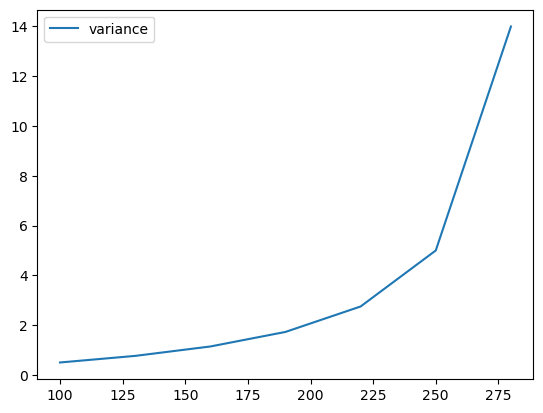

In [220]:
plt.plot(aux_v_n_greater, v_n_greater, label='variance')
plt.legend()
plt.show()

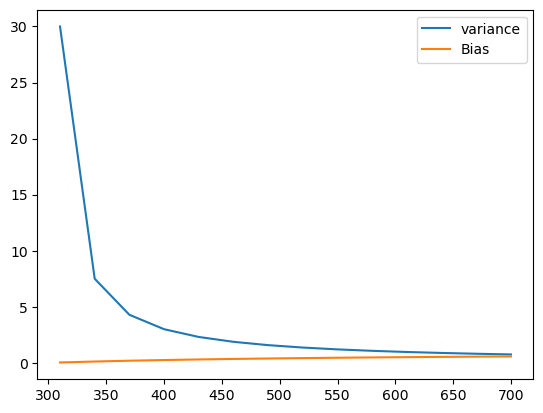

In [221]:
plt.plot(aux_v_n_smaller, v_n_smaller, label='variance')
plt.plot(aux_v_n_smaller, b, label='Bias')
plt.legend()
plt.show()

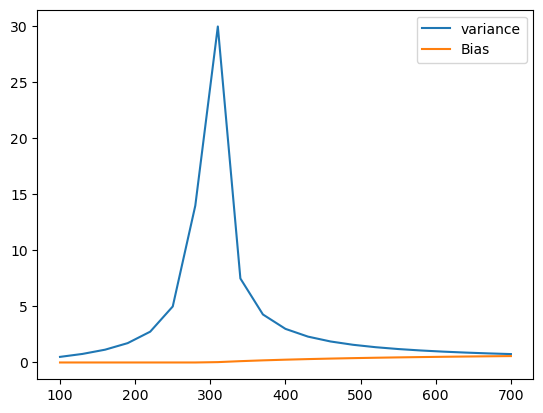

In [222]:
## Combining plots
plt.plot(aux_v_n_greater + aux_v_n_smaller, v_n_greater + v_n_smaller, label='variance')
plt.plot(aux_v_n_greater + aux_v_n_smaller, [0,0,0,0,0,0,0] + b, label='Bias')
plt.legend()
plt.show()

## Question 5
#### letter c)


In [234]:
## Simulating Yi
y_1 = [0]
y_2 = [0]
y_3 = [0]
e = np.random.normal(0, 1, 100)
x=np.arange(1, 101, 1, dtype=int)
   
for t in range(1, 100):
    y_1.append(0 * y_1[t-1] + e[t])
    y_2.append(0.5 * y_2[t-1] + e[t])
    y_3.append(0.95 * y_3[t-1] + e[t])


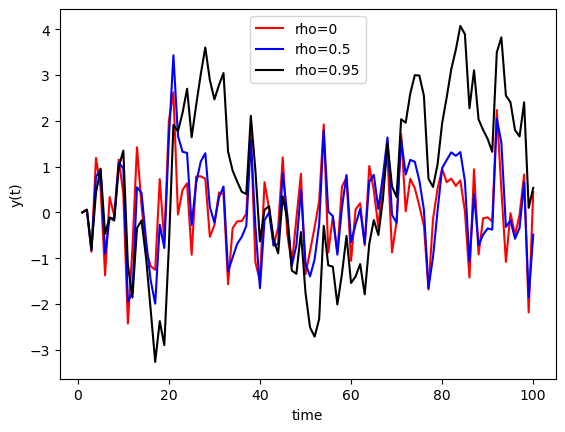

In [235]:
plt.plot(x, y_1, color ="red",label="rho=0") 
plt.plot(x, y_2, color ="blue",label="rho=0.5") 
plt.plot(x, y_3, color ="black",label="rho=0.95") 
plt.legend()
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()

In [249]:
# Fitting Linear model

Y =y_1
X = x

model_1 = sm.OLS(Y,X)
fitted_model_1 = model_1.fit()
fitted_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.2078
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.650
Time:                        16:10:15   Log-Likelihood:                         -135.63
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007      0.002      0.456      0.650      -0.002       0.004
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.096
Skew:                           0.048   Prob(JB):                        0.953
Kurtosis:                       3.117   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
print("For the case tha rho equals to 0")
print("The OLS estimator is: ", np.round(fitted_model_1.params[0],4))
print("The t-stat is: ", np.round(fitted_model_1.tvalues[0],4))

For the case tha rho eqquals to 0
The OLS estimator is:  0.0007
The t-stat is:  0.4558


In [251]:
Y =y_2
X = x

model_2 = sm.OLS(Y,X)
fitted_model_2 = model_2.fit()
fitted_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.8960
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.346
Time:                        16:10:49   Log-Likelihood:                         -142.66
No. Observations:                 100   AIC:                                      287.3
Df Residuals:                      99   BIC:                                      289.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0016      0.002      0.947      0.346      -0.002       0.005
==============================================================================
Omnibus:                        1.580   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.246
Skew:                           0.271   Prob(JB):                        0.536
Kurtosis:                       3.077   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
print("For the case tha rho equals to 0.5")
print("The OLS estimator is: ", np.round(fitted_model_2.params[0],4))
print("The t-stat is: ", np.round(fitted_model_2.tvalues[0],4))

For the case tha rho eqquals to 0.5
The OLS estimator is:  0.0016
The t-stat is:  0.9466


In [253]:
Y =y_3
X = x

model_3 = sm.OLS(Y,X)
fitted_model_3 = model_3.fit()
fitted_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.223
Model:                            OLS   Adj. R-squared (uncentered):              0.216
Method:                 Least Squares   F-statistic:                              28.49
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                    5.98e-07
Time:                        16:11:51   Log-Likelihood:                         -193.46
No. Observations:                 100   AIC:                                      388.9
Df Residuals:                      99   BIC:                                      391.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0154      0.003      5.338      0.000       0.010       0.021
==============================================================================
Omnibus:                        8.206   Durbin-Watson:                   0.328
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                3.357
Skew:                          -0.110   Prob(JB):                        0.187
Kurtosis:                       2.130   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
print("For the case tha rho equals to 0.95")
print("The OLS estimator is: ", np.round(fitted_model_3.params[0],4))
print("The t-stat is: ", np.round(fitted_model_3.tvalues[0],4))

For the case tha rho eqquals to 0.95
The OLS estimator is:  0.0154
The t-stat is:  5.338


At 5% of sig. level, we fail to reject H0 for $\rho$ = 0 and $\rho$ = 0.5, whereas we are able to reject H0 for $\rho$ = 0.95. This suggests that the serial autocorrelation makes $\epsilon_t$ to
deviate from 0, keepig it at this other level.

#### letter d)

In [256]:
Y =y_1
X = x

model_1 = sm.OLS(Y,X)
fitted_model_1 = model_1.fit(cov_type='HAC',cov_kwds={'maxlags':4})
fitted_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.3421
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.560
Time:                        17:25:45   Log-Likelihood:                         -135.63
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0007      0.001      0.585      0.559      -0.002       0.003
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.096
Skew:                           0.048   Prob(JB):                        0.953
Kurtosis:                       3.117   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [257]:
print("For the case tha rho equals to 0")
print("The OLS estimator is: ", np.round(fitted_model_1.params[0],4))
print("The t-stat is: ", np.round(fitted_model_1.tvalues[0],4))

For the case tha rho eqquals to 0
The OLS estimator is:  0.0007
The t-stat is:  0.5849


In [258]:
Y =y_2
X = x

model_2 = sm.OLS(Y,X)
fitted_model_2 = model_2.fit(cov_type='HAC',cov_kwds={'maxlags':4})
fitted_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.6760
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                       0.413
Time:                        17:27:27   Log-Likelihood:                         -142.66
No. Observations:                 100   AIC:                                      287.3
Df Residuals:                      99   BIC:                                      289.9
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0016      0.002      0.822      0.411      -0.002       0.006
==============================================================================
Omnibus:                        1.580   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.246
Skew:                           0.271   Prob(JB):                        0.536
Kurtosis:                       3.077   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [259]:
print("For the case tha rho equals to 0.5")
print("The OLS estimator is: ", np.round(fitted_model_2.params[0],4))
print("The t-stat is: ", np.round(fitted_model_2.tvalues[0],4))

For the case tha rho equals to 0.5
The OLS estimator is:  0.0016
The t-stat is:  0.8222


In [260]:
Y =y_3
X = x

model_3 = sm.OLS(Y,X)
fitted_model_3 = model_3.fit(cov_type='HAC',cov_kwds={'maxlags':4})
fitted_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.223
Model:                            OLS   Adj. R-squared (uncentered):              0.216
Method:                 Least Squares   F-statistic:                              8.646
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                     0.00408
Time:                        17:28:13   Log-Likelihood:                         -193.46
No. Observations:                 100   AIC:                                      388.9
Df Residuals:                      99   BIC:                                      391.5
Df Model:                           1                                                  
Covariance Type:                  HAC                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0154      0.005      2.940      0.003       0.005       0.026
==============================================================================
Omnibus:                        8.206   Durbin-Watson:                   0.328
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                3.357
Skew:                          -0.110   Prob(JB):                        0.187
Kurtosis:                       2.130   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

In [261]:
print("For the case tha rho equals to 0.95")
print("The OLS estimator is: ", np.round(fitted_model_3.params[0],4))
print("The t-stat is: ", np.round(fitted_model_3.tvalues[0],4))

For the case tha rho equals to 0.95
The OLS estimator is:  0.0154
The t-stat is:  2.9404


Again, at 5% of sig. level, we fail to reject H0 for $\rho$ = 0 and $\rho$ = 0.5, whereas we are able to reject H0 for $\rho$ = 0.95.

When $\rho$ = 0, we have t_OLS = 0.4558 and t_NW = 0.5849. 
<br>Newey-West method recognizes some of the noise
as serial correlation, wrongly overestimating the t-statistic.

 When $\rho$ = 0.5, we have t_OLS = 0.9466 and t_NW = 0.8222.
 <br> When $\rho$ = 0.95, we have t_OLS = 5.338 and t_NW = 2.9404.
 <br> For $\rho$ > 0, OLS method underestimate the true standard errors, which reflects in higher values for the t-statistics vs Newey-West method.